<a href="https://colab.research.google.com/github/Yohanes213/Zindi/blob/main/Tensorflow_Zindi_Finicial_Inclusive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [5]:
from sklearn.preprocessing import LabelEncoder

In [44]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [16]:
df = pd.read_csv("Train.csv")

In [17]:
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [18]:
le = LabelEncoder()
df["bank_account"] = le.fit_transform(df["bank_account"])

In [19]:
df.drop(columns=["uniqueid"], inplace=True)

In [20]:
# function to preprocess our data from train models
def preprocessing_data(data):

    # Convert the following numerical labels from interger to float
    float_array = data[["household_size", "age_of_respondent", "year"]].values.astype(float)
    
    # categorical features to be onverted to One Hot Encoding
    categ = ["relationship_with_head",
             "marital_status",
             "education_level",
             "job_type",
             "country"]
    
    # One Hot Encoding conversion
    data = pd.get_dummies(data, prefix_sep="_", columns=categ)
    
    # Label Encoder conversion
    data["location_type"] = le.fit_transform(data["location_type"])
    data["cellphone_access"] = le.fit_transform(data["cellphone_access"])
    data["gender_of_respondent"] = le.fit_transform(data["gender_of_respondent"])
    
    
    return data                  

In [21]:
df = preprocessing_data(df)

In [22]:
neg, pos = np.bincount(df['bank_account'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, neg, 100 * neg / total))

Examples:
    Total: 23524
    Positive: 3312 (14.08% of total)

Examples:
    Total: 23524
    Positive: 20212 (85.92% of total)



In [23]:
df["bank_account"].value_counts(normalize=True)

0    0.859208
1    0.140792
Name: bank_account, dtype: float64

In [26]:
# Use a utility from sklearn to split and shuffle your dataset.
train_df, test_df = train_test_split(df, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

train_labels = np.array(train_df.pop('bank_account'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('bank_account'))
test_labels = np.array(test_df.pop('bank_account'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [27]:
print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (15055,)
Validation labels shape: (3764,)
Test labels shape: (4705,)
Training features shape: (15055, 37)
Validation features shape: (3764, 37)
Test features shape: (4705, 37)


In [28]:
scaler = StandardScaler()

train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)


train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (15055,)
Validation labels shape: (3764,)
Test labels shape: (4705,)
Training features shape: (15055, 37)
Validation features shape: (3764, 37)
Test features shape: (4705, 37)


In [30]:
df.columns

Index(['year', 'bank_account', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head_Child',
       'relationship_with_head_Head of Household',
       'relationship_with_head_Other non-relatives',
       'relationship_with_head_Other relative',
       'relationship_with_head_Parent', 'relationship_with_head_Spouse',
       'marital_status_Divorced/Seperated', 'marital_status_Dont know',
       'marital_status_Married/Living together',
       'marital_status_Single/Never Married', 'marital_status_Widowed',
       'education_level_No formal education',
       'education_level_Other/Dont know/RTA',
       'education_level_Primary education',
       'education_level_Secondary education',
       'education_level_Tertiary education',
       'education_level_Vocational/Specialised training',
       'job_type_Dont Know/Refuse to answer', 'job_type_Farming and Fishing',
       'job_type_Formally employed Governm

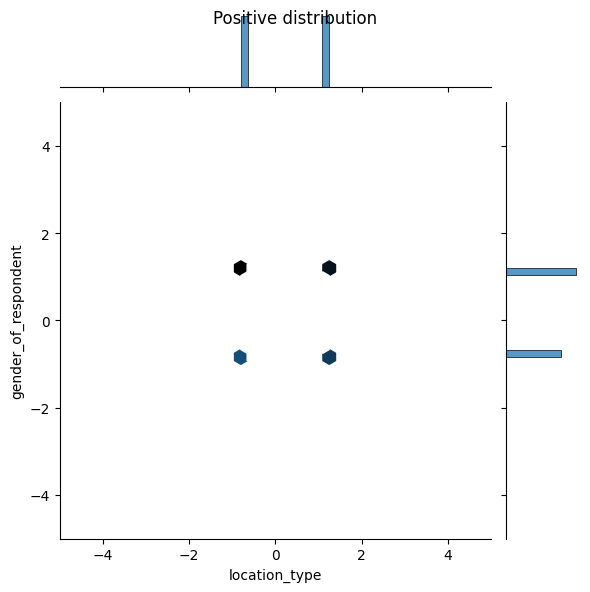

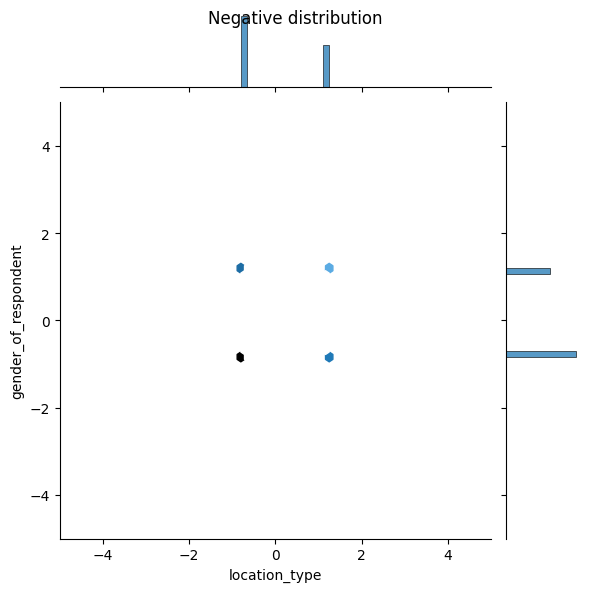

In [31]:
pos_df = pd.DataFrame(train_features[ bool_train_labels], columns=train_df.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns=train_df.columns)

sns.jointplot(x=pos_df['location_type'], y=pos_df['gender_of_respondent'],
              kind='hex', xlim=(-5,5), ylim=(-5,5))
plt.suptitle("Positive distribution")

sns.jointplot(x=neg_df['location_type'], y=neg_df['gender_of_respondent'],
              kind='hex', xlim=(-5,5), ylim=(-5,5))
_ = plt.suptitle("Negative distribution")

In [32]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
          16, activation='relu',
          input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [33]:
EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_prc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [34]:
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                608       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 625
Trainable params: 625
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.predict(train_features[:10])

1/1 [==============================] - 0s 282ms/step


array([[0.5539813 ],
       [0.7165292 ],
       [0.81437624],
       [0.6666493 ],
       [0.720018  ],
       [0.7110992 ],
       [0.94127315],
       [0.45054546],
       [0.678514  ],
       [0.90008026]], dtype=float32)

In [36]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 1.1365


In [37]:
initial_bias = np.log([pos/neg])
initial_bias

array([-1.80872425])

In [38]:
pos/total

0.14079238224791701

In [39]:
model = make_model(output_bias=initial_bias)
model.predict(train_features[:10])

1/1 [==============================] - 0s 63ms/step


array([[0.12087806],
       [0.1124841 ],
       [0.07370315],
       [0.1495433 ],
       [0.32489353],
       [0.13504256],
       [0.08202354],
       [0.09699345],
       [0.10559564],
       [0.03809424]], dtype=float32)

In [40]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.4027


In [41]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

In [42]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [43]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [45]:
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')

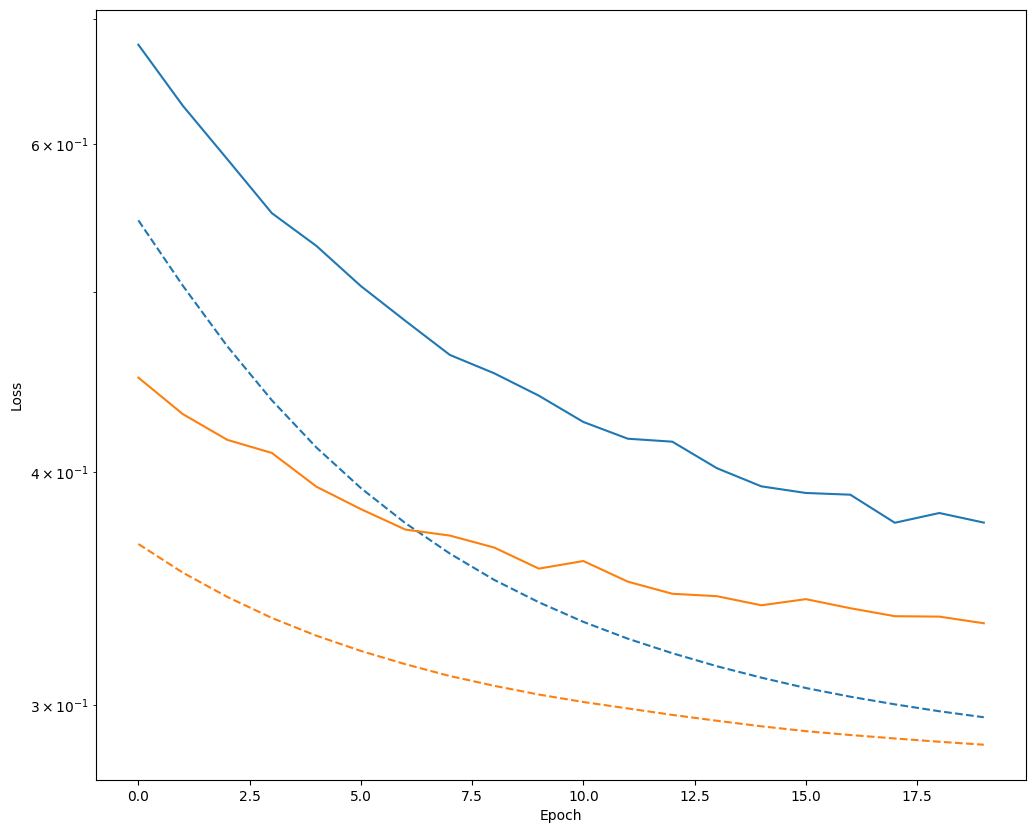

In [46]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [47]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/100
8/8 [==============================] - 5s 201ms/step - loss: 0.4482 - tp: 300.0000 - fp: 585.0000 - tn: 15564.0000 - fn: 2370.0000 - accuracy: 0.8430 - precision: 0.3390 - recall: 0.1124 - auc: 0.6549 - prc: 0.2433 - val_loss: 0.3660 - val_tp: 13.0000 - val_fp: 7.0000 - val_tn: 3244.0000 - val_fn: 500.0000 - val_accuracy: 0.8653 - val_precision: 0.6500 - val_recall: 0.0253 - val_auc: 0.7048 - val_prc: 0.2864
Epoch 2/100
8/8 [==============================] - 0s 61ms/step - loss: 0.4300 - tp: 192.0000 - fp: 486.0000 - tn: 12412.0000 - fn: 1965.0000 - accuracy: 0.8372 - precision: 0.2832 - recall: 0.0890 - auc: 0.6319 - prc: 0.2232 - val_loss: 0.3534 - val_tp: 16.0000 - val_fp: 5.0000 - val_tn: 3246.0000 - val_fn: 497.0000 - val_accuracy: 0.8666 - val_precision: 0.7619 - val_recall: 0.0312 - val_auc: 0.7402 - val_prc: 0.3371
Epoch 3/100
8/8 [==============================] - 0s 46ms/step - loss: 0.4162 - tp: 214.0000 - fp: 403.0000 - tn: 12495.0000 - fn: 1943.0000 - accuracy:

In [48]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)

3/3 [==============================] - 0s 4ms/step


In [77]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p, normalize='true')
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

In [69]:
len(test_labels)

4705

loss :  0.2848215401172638
tp :  193.0
fp :  65.0
tn :  3998.0
fn :  449.0
accuracy :  0.8907545208930969
precision :  0.748062014579773
recall :  0.3006230592727661
auc :  0.8493397831916809
prc :  0.5635930299758911



ValueError: ignored

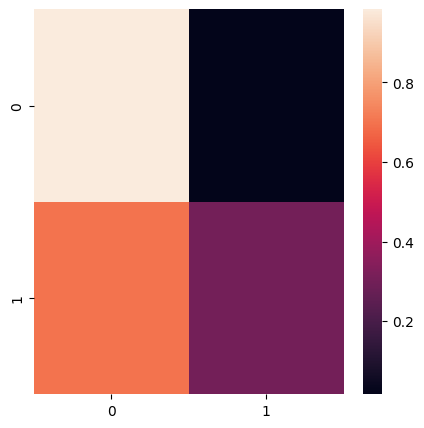

In [78]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)

In [51]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.58
Weight for class 1: 3.55


In [52]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight)

Epoch 1/100
8/8 [==============================] - 3s 112ms/step - loss: 1.1344 - tp: 392.0000 - fp: 696.0000 - tn: 16265.0000 - fn: 2407.0000 - accuracy: 0.8430 - precision: 0.3603 - recall: 0.1401 - auc: 0.6661 - prc: 0.2569 - val_loss: 0.3676 - val_tp: 19.0000 - val_fp: 15.0000 - val_tn: 3236.0000 - val_fn: 494.0000 - val_accuracy: 0.8648 - val_precision: 0.5588 - val_recall: 0.0370 - val_auc: 0.7002 - val_prc: 0.2750
Epoch 2/100
8/8 [==============================] - 0s 20ms/step - loss: 1.0773 - tp: 255.0000 - fp: 711.0000 - tn: 12187.0000 - fn: 1902.0000 - accuracy: 0.8264 - precision: 0.2640 - recall: 0.1182 - auc: 0.6207 - prc: 0.2130 - val_loss: 0.3573 - val_tp: 32.0000 - val_fp: 31.0000 - val_tn: 3220.0000 - val_fn: 481.0000 - val_accuracy: 0.8640 - val_precision: 0.5079 - val_recall: 0.0624 - val_auc: 0.7300 - val_prc: 0.3146
Epoch 3/100
8/8 [==============================] - 0s 20ms/step - loss: 0.9909 - tp: 334.0000 - fp: 774.0000 - tn: 12124.0000 - fn: 1823.0000 - accurac

In [53]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)

3/3 [==============================] - 0s 3ms/step


loss :  0.4393383860588074
tp :  422.0
fp :  620.0
tn :  3443.0
fn :  220.0
accuracy :  0.8214665055274963
precision :  0.40499040484428406
recall :  0.6573208570480347
auc :  0.8482874631881714
prc :  0.5531964302062988

Legitimate Transactions Detected (True Negatives):  3443
Legitimate Transactions Incorrectly Detected (False Positives):  620
Fraudulent Transactions Missed (False Negatives):  220
Fraudulent Transactions Detected (True Positives):  422
Total Fraudulent Transactions:  642


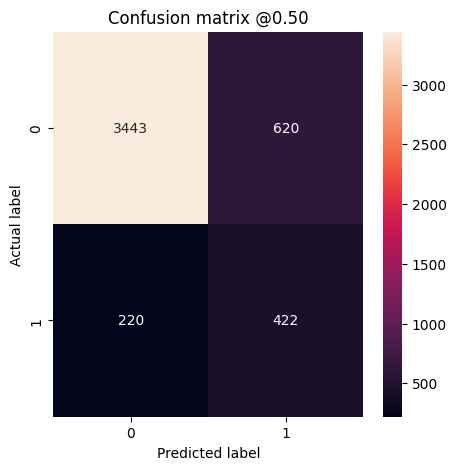

In [54]:
weighted_results = weighted_model.evaluate(test_features, test_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_weighted)

In [55]:
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]

In [56]:
ids = np.arange(len(pos_features))
choices = np.random.choice(ids, len(neg_features))

res_pos_features = pos_features[choices]
res_pos_labels = pos_labels[choices]

res_pos_features.shape

(12898, 37)

In [58]:
resampled_features = np.concatenate([res_pos_features, neg_features], axis=0)
resampled_labels = np.concatenate([res_pos_labels, neg_labels], axis=0)

order = np.arange(len(resampled_labels))
np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

resampled_features.shape

(25796, 37)

In [59]:
BUFFER_SIZE = 10000

def make_ds(features, labels):
  ds = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
  ds = ds.shuffle(BUFFER_SIZE).repeat()
  return ds

pos_ds = make_ds(pos_features, pos_labels)
neg_ds = make_ds(neg_features, neg_labels)


In [60]:
for features, label in pos_ds.take(1):
  print("Features:\n", features.numpy())
  print()
  print("Label: ", label.numpy())

Features:
 [-1.15833099  1.25054484  0.59016053 -0.36139552 -0.83441034 -0.83641711
 -0.32633899 -1.09224906 -0.09150084 -0.1694058  -0.2246031   1.62156097
 -0.31436428 -0.01411769  1.08903747 -0.71363379 -0.36043854 -0.48646879
 -0.03554763  0.91578728 -0.46811009 -0.22768615 -0.18895623 -0.07535266
 -0.54944077 -0.13073747 -0.21783039 -0.10623095 -0.55323053 -0.16857414
 -0.22049354  2.87680935 -0.61289446 -0.5973234   1.30866826 -0.62377394
 -0.31116482]

Label:  1


In [61]:
resampled_ds = tf.data.Dataset.sample_from_datasets([pos_ds, neg_ds], weights=[0.5, 0.5])
resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)

In [62]:
for features, label in resampled_ds.take(1):
  print(label.numpy().mean())

0.52001953125


In [63]:
resampled_steps_per_epoch = np.ceil(2.0*neg/BATCH_SIZE)
resampled_steps_per_epoch

20.0

In [64]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = resampled_model.fit(
    resampled_ds,
    epochs=EPOCHS,
    steps_per_epoch=resampled_steps_per_epoch,
    callbacks=[early_stopping],
    validation_data=val_ds)

Epoch 1/100
20/20 [==============================] - 12s 272ms/step - loss: 0.7359 - tp: 11046.0000 - fp: 7553.0000 - tn: 17087.0000 - fn: 9979.0000 - accuracy: 0.6161 - precision: 0.5939 - recall: 0.5254 - auc: 0.6529 - prc: 0.6029 - val_loss: 0.5799 - val_tp: 347.0000 - val_fp: 984.0000 - val_tn: 2267.0000 - val_fn: 166.0000 - val_accuracy: 0.6945 - val_precision: 0.2607 - val_recall: 0.6764 - val_auc: 0.7589 - val_prc: 0.3616
Epoch 2/100
20/20 [==============================] - 2s 126ms/step - loss: 0.6617 - tp: 12556.0000 - fp: 7195.0000 - tn: 13449.0000 - fn: 7760.0000 - accuracy: 0.6349 - precision: 0.6357 - recall: 0.6180 - auc: 0.6853 - prc: 0.6773 - val_loss: 0.5619 - val_tp: 393.0000 - val_fp: 985.0000 - val_tn: 2266.0000 - val_fn: 120.0000 - val_accuracy: 0.7064 - val_precision: 0.2852 - val_recall: 0.7661 - val_auc: 0.8076 - val_prc: 0.4474
Epoch 3/100
20/20 [==============================] - 2s 122ms/step - loss: 0.6232 - tp: 13588.0000 - fp: 6984.0000 - tn: 13534.0000 - f

In [65]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

resampled_history = resampled_model.fit(
    resampled_ds,
    # These are not real epochs
    steps_per_epoch=20,
    epochs=10*EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_ds))

Epoch 1/1000
20/20 [==============================] - 5s 121ms/step - loss: 0.7337 - tp: 11069.0000 - fp: 7774.0000 - tn: 16054.0000 - fn: 9827.0000 - accuracy: 0.6065 - precision: 0.5874 - recall: 0.5297 - auc: 0.6454 - prc: 0.6040 - val_loss: 0.5783 - val_tp: 346.0000 - val_fp: 981.0000 - val_tn: 2270.0000 - val_fn: 167.0000 - val_accuracy: 0.6950 - val_precision: 0.2607 - val_recall: 0.6745 - val_auc: 0.7593 - val_prc: 0.3626
Epoch 2/1000
20/20 [==============================] - 2s 115ms/step - loss: 0.6652 - tp: 12442.0000 - fp: 7242.0000 - tn: 13402.0000 - fn: 7874.0000 - accuracy: 0.6310 - precision: 0.6321 - recall: 0.6124 - auc: 0.6832 - prc: 0.6746 - val_loss: 0.5630 - val_tp: 396.0000 - val_fp: 991.0000 - val_tn: 2260.0000 - val_fn: 117.0000 - val_accuracy: 0.7056 - val_precision: 0.2855 - val_recall: 0.7719 - val_auc: 0.8078 - val_prc: 0.4492
Epoch 3/1000
20/20 [==============================] - 2s 91ms/step - loss: 0.6263 - tp: 13556.0000 - fp: 7054.0000 - tn: 13464.0000 - 

In [66]:
train_predictions_resampled = resampled_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_resampled = resampled_model.predict(test_features, batch_size=BATCH_SIZE)

3/3 [==============================] - 0s 5ms/step


loss :  0.46533098816871643
tp :  464.0
fp :  809.0
tn :  3254.0
fn :  178.0
accuracy :  0.7902231812477112
precision :  0.36449331045150757
recall :  0.722741425037384
auc :  0.8493632078170776
prc :  0.5596750378608704

Legitimate Transactions Detected (True Negatives):  3254
Legitimate Transactions Incorrectly Detected (False Positives):  809
Fraudulent Transactions Missed (False Negatives):  178
Fraudulent Transactions Detected (True Positives):  464
Total Fraudulent Transactions:  642


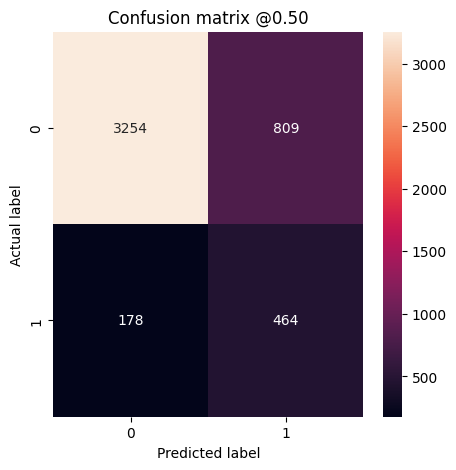

In [67]:
resampled_results = resampled_model.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model.metrics_names, resampled_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_resampled)

In [80]:
test_labels

array([0, 0, 1, ..., 0, 0, 0])

In [84]:
yyy = test_predictions_resampled.squeeze()

In [85]:
y = pd.Series(yyy.squeeze())

In [86]:
y

0       0.185851
1       0.420819
2       0.911217
3       0.755220
4       0.316637
          ...   
4700    0.860380
4701    0.374359
4702    0.382360
4703    0.364195
4704    0.092492
Length: 4705, dtype: float32

In [88]:
confusion_matrix(test_labels, round(y), normalize='true')

array([[0.80088604, 0.19911396],
       [0.27725857, 0.72274143]])

In [108]:
df_test = pd.read_csv("Test.csv")

In [90]:
df_test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [92]:
df.shape

(23524, 38)

In [93]:
df_test.drop(columns=["uniqueid"], inplace=True)

In [94]:
df_test_pre = preprocessing_data(df_test)

In [97]:
df_test_pre.shape

(10086, 37)

In [124]:
train_features = np.array(df_test_pre)
train_features = scaler.fit_transform(train_features)
train_features = np.clip(train_features, -5, 5)

In [125]:
test_predictions_resampled = resampled_model.predict(train_features)

316/316 [==============================] - 1s 4ms/step


In [126]:
test_predictions_resampled

array([[0.96125567],
       [0.9822163 ],
       [0.07072134],
       ...,
       [0.7246363 ],
       [0.22763638],
       [0.46177042]], dtype=float32)

In [127]:
yyyy = pd.Series(test_predictions_resampled.squeeze())

In [129]:
round(yyyy)

0        1.0
1        1.0
2        0.0
3        0.0
4        0.0
        ... 
10081    0.0
10082    0.0
10083    1.0
10084    0.0
10085    0.0
Length: 10086, dtype: float32

In [132]:
submission = pd.DataFrame({"uniqueid": df_test["uniqueid"] + " x " + df_test["country"],
                           "bank_account": round(yyyy).astype(int)})
submission.to_csv('submission.csv', index = False)

In [133]:
submission["bank_account"].value_counts()

0    7284
1    2802
Name: bank_account, dtype: int64